In [ ]:
"""
Job Recommendation Engine

Authors:
Vishawjeet A. Deshmukh
Ganesh Shinde
"""

In [1]:
# Loading Data

import pandas as pd

users=pd.read_csv(filepath_or_buffer="Data/users.tsv",sep="\t")
user_history=pd.read_csv(filepath_or_buffer="Data/user_history.tsv",sep="\t")
jobs=pd.read_csv(filepath_or_buffer="Data/jobs.csv",encoding = "ISO-8859-1",error_bad_lines=False)
jobs_applied=pd.read_csv(filepath_or_buffer="Data/apps.tsv",sep="\t")
print("Data Loaded Successfully.")

Data Loaded Successfully.


In [12]:
# Visualization 

top10_city=users.City.value_counts()[0:10]
top10_city

Chicago         7675
Houston         6013
Indianapolis    4871
Miami           4750
Philadelphia    4710
Charlotte       4108
Orlando         3898
Dallas          3898
Phoenix         3647
Kansas City     2947
Name: City, dtype: int64

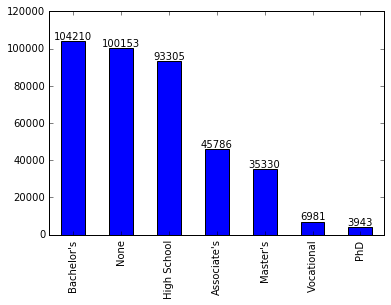

In [48]:
import matplotlib.pyplot as plt

%matplotlib inline

ax=users.DegreeType.value_counts().plot(kind="bar")

rects = ax.patches
labels = users.DegreeType.value_counts()

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label,ha='center', va='bottom')

plt.show(ax)

In [4]:
print(users.shape)
users.head()

(389708, 15)


,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
0,47,1,Train,Paramount,CA,US,90723,High School,NaN,1999-06-01 00:00:00,3,10.0,Yes,No,0
1,72,1,Train,La Mesa,CA,US,91941,Master's,Anthropology,2011-01-01 00:00:00,10,8.0,Yes,No,0
2,80,1,Train,Williamstown,NJ,US,08094,High School,Not Applicable,1985-06-01 00:00:00,5,11.0,Yes,Yes,5
3,98,1,Train,Astoria,NY,US,11105,Master's,Journalism,2007-05-01 00:00:00,3,3.0,Yes,No,0
4,123,1,Train,Baton Rouge,LA,US,70808,Bachelor's,Agricultural Business,2011-05-01 00:00:00,1,9.0,Yes,No,0


In [84]:
print(jobs.shape)
jobs.head()

(1092096, 11)


,JobID,WindowID,Title,Description,Requirements,City,State,Country,Zip5,StartDate,EndDate
0,1,1,Security Engineer/Technical Lead,<p>Security Clearance Required:&nbsp; Top Secr...,<p>SKILL SET</p>\r<p>&nbsp;</p>\r<p>Network Se...,Washington,DC,US,20531,2012-03-07 13:17:01.643,2012-04-06 23:59:59
1,2,3,IT Analyst SME,<span>\r<p>Security Clearance Required:Â,"Develop and implement measures, controls, inpu...",Washington,DC,US,,2012-03-29 21:11:23.42,2012-04-28 23:59:59
2,3,7,Proposal Manager,<div>\r<p><span>Security Clearance Required: ...,"<p><span><strong><span style=""text-decoration:...",Fairfax,VA,US,22032,2012-05-28 11:55:33.827,2012-06-27 23:59:00
3,4,1,SAP Business Analyst / WM,<strong>NO Corp. to Corp resumes&nbsp;are bein...,<p><b>WHAT YOU NEED: </b></p>\r<p>Four year co...,Charlotte,NC,US,28217,2012-03-21 02:03:44.137,2012-04-20 23:59:59
4,5,3,Business Analyst / Business Process Owner,<p><b><span>Business Process Owner âHiring i...,<p><b><span>What you need:</span></b> </p>\r<u...,Columbia,SC,US,29210,2012-04-16 11:16:45.127,2012-05-15 23:59:59


In [3]:
print(jobs_applied.shape)
jobs_applied.head()

(1603111, 5)


,UserID,WindowID,Split,ApplicationDate,JobID
0,47,1,Train,2012-04-04 15:56:23.537,169528
1,47,1,Train,2012-04-06 01:03:00.003,284009
2,47,1,Train,2012-04-05 02:40:27.753,2121
3,47,1,Train,2012-04-05 02:37:02.673,848187
4,47,1,Train,2012-04-05 22:44:06.653,733748


In [71]:
print(user_history.shape)
user_history.head()

(1753901, 5)


,UserID,WindowID,Split,Sequence,JobTitle
0,47,1,Train,1,National Space Communication Programs-Special ...
1,47,1,Train,2,Detention Officer
2,47,1,Train,3,"Passenger Screener, TSA"
3,72,1,Train,1,"Lecturer, Department of Anthropology"
4,72,1,Train,2,Student Assistant


In [2]:
# Preparing Data set for Recommendations:
# We are dividing data of applied jobs in test and train

#from sklearn.cross_validation import train_test_split
#train_jobs_applied,test_jobs_applied=train_test_split(jobs_applied,test_size = 0.4)

jobs_applied=jobs_applied.sort_values("UserID",ascending=1)
train_jobs_applied=jobs_applied[0:961870]
test_jobs_applied=jobs_applied[961870:]
print("Train shape :",train_jobs_applied.shape)
print("Test shape :",test_jobs_applied.shape)

('Train shape :', (961870, 5))
('Test shape :', (641241, 5))


In [3]:
#Converting data in numeric

##Users
for col in ['Split','City','State','Country','ZipCode','DegreeType','Major','WorkHistoryCount','TotalYearsExperience','CurrentlyEmployed','ManagedOthers','ManagedHowMany']:
    users[col]=pd.Categorical(users[col])
    users[col]=users[col].cat.codes

users['GraduationDate']=pd.to_numeric(pd.to_datetime(users['GraduationDate']))

###Users_history
for col in ['Split','JobTitle']:
    user_history[col]=pd.Categorical(user_history[col])
    user_history[col]=user_history[col].cat.codes

###Merging User History with User
user_history_flt=user_history[user_history["Sequence"]==1]
users=pd.merge(users,user_history_flt[["UserID","JobTitle"]],on='UserID',how='left')

###Jobs
for col in ['Title','City','State','Country','Zip5','StartDate','EndDate']:
    jobs[col]=pd.Categorical(jobs[col])
    jobs[col]=jobs[col].cat.codes

jobs['StartDate']=pd.to_numeric(pd.to_datetime(jobs['StartDate']))
jobs['GraduationDate']=pd.to_numeric(pd.to_datetime(jobs['EndDate']))


print("Done")

Done


In [4]:
# Since we’ll be using GraphLab, we have to convert dataframe into SFrames.
import graphlab

train_data=graphlab.SFrame(train_jobs_applied)
test_data=graphlab.SFrame(test_jobs_applied)

users_sframe=graphlab.SFrame(users)
user_history_sframe=graphlab.SFrame(user_history)
jobs_sframe=graphlab.SFrame(jobs[['JobID','WindowID','Title','City','State','Country','Zip5','StartDate','EndDate']])
print("Done")

This non-commercial license of GraphLab Create for academic use is assigned to vishawjeet.bdapm02160252@spjain.org and will expire on June 03, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\HP\AppData\Local\Temp\graphlab_server_1497100716.log.0


Done


In [5]:
#Training Model
#item_sim_model=graphlab.item_similarity_recommender.create(train_data,user_id="UserID",user_data=users_sframe,item_id="JobID",item_data=jobs_sframe,similarity_type="jaccard")
item_sim_model=graphlab.item_similarity_recommender.create(train_data,user_id="JobID",user_data=jobs_sframe,
                                                           item_id="UserID",item_data=users_sframe,similarity_type="jaccard")
print("Done")

Recsys training: model = item_similarity

Warning: Ignoring columns WindowID, Split, ApplicationDate;

To use one of these as a target column, set target = <column_name>

and use a method that allows the use of a target.

Preparing data set.

Data has 961870 observations with 1092096 users and 389708 items.

Data prepared in: 3.58343s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 84.499ms                       | 0.5        |

| 179.254ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 3.72s                               | 10               | 39170           |

| 5.59s                               | 100              | 389708          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 7.37406s

Done


In [6]:
#Make Recommendations:
ID_list=list(pd.unique(test_jobs_applied.UserID))
#item_sim_recomm = item_sim_model.recommend(users=ID_list[0:5],k=15)
item_sim_recomm = item_sim_model.recommend(items =ID_list[0:5],k=15)
print("Done")

recommendations finished on 1000/1092096 queries. users per second: 1330.71

recommendations finished on 2000/1092096 queries. users per second: 1443.6

recommendations finished on 3000/1092096 queries. users per second: 1480.84

recommendations finished on 4000/1092096 queries. users per second: 1498.5

recommendations finished on 5000/1092096 queries. users per second: 1511.81

recommendations finished on 6000/1092096 queries. users per second: 1522.36

recommendations finished on 7000/1092096 queries. users per second: 1522.33

recommendations finished on 8000/1092096 queries. users per second: 1525.07

recommendations finished on 9000/1092096 queries. users per second: 1531.62

recommendations finished on 10000/1092096 queries. users per second: 1532.31

recommendations finished on 11000/1092096 queries. users per second: 1536.3

recommendations finished on 12000/1092096 queries. users per second: 1534.82

recommendations finished on 13000/1092096 queries. users per second: 1536.2

recommendations finished on 14000/1092096 queries. users per second: 1539.66

recommendations finished on 15000/1092096 queries. users per second: 1540.22

recommendations finished on 16000/1092096 queries. users per second: 1543.16

recommendations finished on 17000/1092096 queries. users per second: 1543.8

recommendations finished on 18000/1092096 queries. users per second: 1544.77

recommendations finished on 19000/1092096 queries. users per second: 1545.26

recommendations finished on 20000/1092096 queries. users per second: 1547.07

recommendations finished on 21000/1092096 queries. users per second: 1548.55

recommendations finished on 22000/1092096 queries. users per second: 1547.76

recommendations finished on 23000/1092096 queries. users per second: 1547.26

recommendations finished on 24000/1092096 queries. users per second: 1546.89

recommendations finished on 25000/1092096 queries. users per second: 1546.75

recommendations finished on 26000/1092096 queries. users per second: 1546.52

recommendations finished on 27000/1092096 queries. users per second: 1546.89

recommendations finished on 28000/1092096 queries. users per second: 1546.85

recommendations finished on 29000/1092096 queries. users per second: 1546.56

recommendations finished on 30000/1092096 queries. users per second: 1546.37

recommendations finished on 31000/1092096 queries. users per second: 1546

recommendations finished on 32000/1092096 queries. users per second: 1546.55

recommendations finished on 33000/1092096 queries. users per second: 1546.89

recommendations finished on 34000/1092096 queries. users per second: 1546.75

recommendations finished on 35000/1092096 queries. users per second: 1546.38

recommendations finished on 36000/1092096 queries. users per second: 1546.82

recommendations finished on 37000/1092096 queries. users per second: 1547.34

recommendations finished on 38000/1092096 queries. users per second: 1546.42

recommendations finished on 39000/1092096 queries. users per second: 1534.41

recommendations finished on 40000/1092096 queries. users per second: 1521.54

recommendations finished on 41000/1092096 queries. users per second: 1511.68

recommendations finished on 42000/1092096 queries. users per second: 1504.42

recommendations finished on 43000/1092096 queries. users per second: 1504.27

recommendations finished on 44000/1092096 queries. users per second: 1503.03

recommendations finished on 45000/1092096 queries. users per second: 1503.65

recommendations finished on 46000/1092096 queries. users per second: 1504.88

recommendations finished on 47000/1092096 queries. users per second: 1502.65

recommendations finished on 48000/1092096 queries. users per second: 1495.78

recommendations finished on 49000/1092096 queries. users per second: 1493.07

recommendations finished on 50000/1092096 queries. users per second: 1491.63

recommendations finished on 51000/1092096 queries. users per second: 1492.86

recommendations finished on 52000/1092096 queries. users per second: 1493.3

recommendations finished on 53000/1092096 queries. users per second: 1494.4

recommendations finished on 54000/1092096 queries. users per second: 1493.58

recommendations finished on 55000/1092096 queries. users per second: 1492.39

recommendations finished on 56000/1092096 queries. users per second: 1491.42

recommendations finished on 57000/1092096 queries. users per second: 1490.23

recommendations finished on 58000/1092096 queries. users per second: 1488.89

recommendations finished on 59000/1092096 queries. users per second: 1488.67

recommendations finished on 60000/1092096 queries. users per second: 1489.5

recommendations finished on 61000/1092096 queries. users per second: 1489.49

recommendations finished on 62000/1092096 queries. users per second: 1490.49

recommendations finished on 63000/1092096 queries. users per second: 1491.21

recommendations finished on 64000/1092096 queries. users per second: 1490.64

recommendations finished on 65000/1092096 queries. users per second: 1488.18

recommendations finished on 66000/1092096 queries. users per second: 1483.89

recommendations finished on 67000/1092096 queries. users per second: 1479.3

recommendations finished on 68000/1092096 queries. users per second: 1471.44

recommendations finished on 69000/1092096 queries. users per second: 1464.69

recommendations finished on 70000/1092096 queries. users per second: 1459.82

recommendations finished on 71000/1092096 queries. users per second: 1456.42

recommendations finished on 72000/1092096 queries. users per second: 1454.56

recommendations finished on 73000/1092096 queries. users per second: 1452.89

recommendations finished on 74000/1092096 queries. users per second: 1451.39

recommendations finished on 75000/1092096 queries. users per second: 1450.71

recommendations finished on 76000/1092096 queries. users per second: 1447.69

recommendations finished on 77000/1092096 queries. users per second: 1447.24

recommendations finished on 78000/1092096 queries. users per second: 1445.63

recommendations finished on 79000/1092096 queries. users per second: 1444.64

recommendations finished on 80000/1092096 queries. users per second: 1444.9

recommendations finished on 81000/1092096 queries. users per second: 1444

recommendations finished on 82000/1092096 queries. users per second: 1443.64

recommendations finished on 83000/1092096 queries. users per second: 1442.09

recommendations finished on 84000/1092096 queries. users per second: 1441.67

recommendations finished on 85000/1092096 queries. users per second: 1439.5

recommendations finished on 86000/1092096 queries. users per second: 1436.6

recommendations finished on 87000/1092096 queries. users per second: 1435.06

recommendations finished on 88000/1092096 queries. users per second: 1433.69

recommendations finished on 89000/1092096 queries. users per second: 1430.15

recommendations finished on 90000/1092096 queries. users per second: 1428.36

recommendations finished on 91000/1092096 queries. users per second: 1428.12

recommendations finished on 92000/1092096 queries. users per second: 1425.95

recommendations finished on 93000/1092096 queries. users per second: 1423.23

recommendations finished on 94000/1092096 queries. users per second: 1422.61

recommendations finished on 95000/1092096 queries. users per second: 1422.21

recommendations finished on 96000/1092096 queries. users per second: 1421.01

recommendations finished on 97000/1092096 queries. users per second: 1420.22

recommendations finished on 98000/1092096 queries. users per second: 1419.16

recommendations finished on 99000/1092096 queries. users per second: 1417.43

recommendations finished on 100000/1092096 queries. users per second: 1414.35

recommendations finished on 101000/1092096 queries. users per second: 1412.87

recommendations finished on 102000/1092096 queries. users per second: 1412.93

recommendations finished on 103000/1092096 queries. users per second: 1412.26

recommendations finished on 104000/1092096 queries. users per second: 1411.29

recommendations finished on 105000/1092096 queries. users per second: 1411.17

recommendations finished on 106000/1092096 queries. users per second: 1410

recommendations finished on 107000/1092096 queries. users per second: 1406.82

recommendations finished on 108000/1092096 queries. users per second: 1405.06

recommendations finished on 109000/1092096 queries. users per second: 1402.94

recommendations finished on 110000/1092096 queries. users per second: 1401.41

recommendations finished on 111000/1092096 queries. users per second: 1399.88

recommendations finished on 112000/1092096 queries. users per second: 1398.59

recommendations finished on 113000/1092096 queries. users per second: 1395.61

recommendations finished on 114000/1092096 queries. users per second: 1393.73

recommendations finished on 115000/1092096 queries. users per second: 1392.09

recommendations finished on 116000/1092096 queries. users per second: 1390.44

recommendations finished on 117000/1092096 queries. users per second: 1389.47

recommendations finished on 118000/1092096 queries. users per second: 1388.07

recommendations finished on 119000/1092096 queries. users per second: 1386.48

recommendations finished on 120000/1092096 queries. users per second: 1384.8

recommendations finished on 121000/1092096 queries. users per second: 1383.27

recommendations finished on 122000/1092096 queries. users per second: 1381.82

recommendations finished on 123000/1092096 queries. users per second: 1380.82

recommendations finished on 124000/1092096 queries. users per second: 1379.66

recommendations finished on 125000/1092096 queries. users per second: 1378.63

recommendations finished on 126000/1092096 queries. users per second: 1377.58

recommendations finished on 127000/1092096 queries. users per second: 1375.4

recommendations finished on 128000/1092096 queries. users per second: 1375.05

recommendations finished on 129000/1092096 queries. users per second: 1374.27

recommendations finished on 130000/1092096 queries. users per second: 1374.18

recommendations finished on 131000/1092096 queries. users per second: 1372.65

recommendations finished on 132000/1092096 queries. users per second: 1372.09

recommendations finished on 133000/1092096 queries. users per second: 1367.95

recommendations finished on 134000/1092096 queries. users per second: 1364.18

recommendations finished on 135000/1092096 queries. users per second: 1363.25

recommendations finished on 136000/1092096 queries. users per second: 1359.5

recommendations finished on 137000/1092096 queries. users per second: 1356.67

recommendations finished on 138000/1092096 queries. users per second: 1354.1

recommendations finished on 139000/1092096 queries. users per second: 1351.2

recommendations finished on 140000/1092096 queries. users per second: 1351.57

recommendations finished on 141000/1092096 queries. users per second: 1352.09

recommendations finished on 142000/1092096 queries. users per second: 1352.59

recommendations finished on 143000/1092096 queries. users per second: 1352.69

recommendations finished on 144000/1092096 queries. users per second: 1353.14

recommendations finished on 145000/1092096 queries. users per second: 1353.66

recommendations finished on 146000/1092096 queries. users per second: 1354.27

recommendations finished on 147000/1092096 queries. users per second: 1353.53

recommendations finished on 148000/1092096 queries. users per second: 1352.84

recommendations finished on 149000/1092096 queries. users per second: 1352.52

recommendations finished on 150000/1092096 queries. users per second: 1352.31

recommendations finished on 151000/1092096 queries. users per second: 1352.83

recommendations finished on 152000/1092096 queries. users per second: 1352.27

recommendations finished on 153000/1092096 queries. users per second: 1352.69

recommendations finished on 154000/1092096 queries. users per second: 1353.36

recommendations finished on 155000/1092096 queries. users per second: 1353.89

recommendations finished on 156000/1092096 queries. users per second: 1354.55

recommendations finished on 157000/1092096 queries. users per second: 1354.94

recommendations finished on 158000/1092096 queries. users per second: 1355.46

recommendations finished on 159000/1092096 queries. users per second: 1355.99

recommendations finished on 160000/1092096 queries. users per second: 1356.48

recommendations finished on 161000/1092096 queries. users per second: 1357.06

recommendations finished on 162000/1092096 queries. users per second: 1357.55

recommendations finished on 163000/1092096 queries. users per second: 1358.19

recommendations finished on 164000/1092096 queries. users per second: 1358.81

recommendations finished on 165000/1092096 queries. users per second: 1359.33

recommendations finished on 166000/1092096 queries. users per second: 1359.98

recommendations finished on 167000/1092096 queries. users per second: 1360.53

recommendations finished on 168000/1092096 queries. users per second: 1361.14

recommendations finished on 169000/1092096 queries. users per second: 1361.72

recommendations finished on 170000/1092096 queries. users per second: 1362.22

recommendations finished on 171000/1092096 queries. users per second: 1362.71

recommendations finished on 172000/1092096 queries. users per second: 1363.23

recommendations finished on 173000/1092096 queries. users per second: 1363.78

recommendations finished on 174000/1092096 queries. users per second: 1364.01

recommendations finished on 175000/1092096 queries. users per second: 1364.18

recommendations finished on 176000/1092096 queries. users per second: 1364.3

recommendations finished on 177000/1092096 queries. users per second: 1364.35

recommendations finished on 178000/1092096 queries. users per second: 1364.66

recommendations finished on 179000/1092096 queries. users per second: 1364.85

recommendations finished on 180000/1092096 queries. users per second: 1364.92

recommendations finished on 181000/1092096 queries. users per second: 1364.92

recommendations finished on 182000/1092096 queries. users per second: 1365.04

recommendations finished on 183000/1092096 queries. users per second: 1365.53

recommendations finished on 184000/1092096 queries. users per second: 1366.09

recommendations finished on 185000/1092096 queries. users per second: 1365.91

recommendations finished on 186000/1092096 queries. users per second: 1364.9

recommendations finished on 187000/1092096 queries. users per second: 1363.78

recommendations finished on 188000/1092096 queries. users per second: 1362.7

recommendations finished on 189000/1092096 queries. users per second: 1363.07

recommendations finished on 190000/1092096 queries. users per second: 1363.11

recommendations finished on 191000/1092096 queries. users per second: 1363.41

recommendations finished on 192000/1092096 queries. users per second: 1363.65

recommendations finished on 193000/1092096 queries. users per second: 1364

recommendations finished on 194000/1092096 queries. users per second: 1364.3

recommendations finished on 195000/1092096 queries. users per second: 1363.9

recommendations finished on 196000/1092096 queries. users per second: 1364.18

recommendations finished on 197000/1092096 queries. users per second: 1364.25

recommendations finished on 198000/1092096 queries. users per second: 1364.39

recommendations finished on 199000/1092096 queries. users per second: 1364.67

recommendations finished on 200000/1092096 queries. users per second: 1364.94

recommendations finished on 201000/1092096 queries. users per second: 1365.32

recommendations finished on 202000/1092096 queries. users per second: 1365.64

recommendations finished on 203000/1092096 queries. users per second: 1365.7

recommendations finished on 204000/1092096 queries. users per second: 1366.01

recommendations finished on 205000/1092096 queries. users per second: 1366.05

recommendations finished on 206000/1092096 queries. users per second: 1366

recommendations finished on 207000/1092096 queries. users per second: 1366.32

recommendations finished on 208000/1092096 queries. users per second: 1366.2

recommendations finished on 209000/1092096 queries. users per second: 1366.33

recommendations finished on 210000/1092096 queries. users per second: 1366.08

recommendations finished on 211000/1092096 queries. users per second: 1366.31

recommendations finished on 212000/1092096 queries. users per second: 1366.68

recommendations finished on 213000/1092096 queries. users per second: 1367.21

recommendations finished on 214000/1092096 queries. users per second: 1367.69

recommendations finished on 215000/1092096 queries. users per second: 1367.84

recommendations finished on 216000/1092096 queries. users per second: 1367.98

recommendations finished on 217000/1092096 queries. users per second: 1367.8

recommendations finished on 218000/1092096 queries. users per second: 1366.7

recommendations finished on 219000/1092096 queries. users per second: 1365.64

recommendations finished on 220000/1092096 queries. users per second: 1364.59

recommendations finished on 221000/1092096 queries. users per second: 1363.67

recommendations finished on 222000/1092096 queries. users per second: 1362.52

recommendations finished on 223000/1092096 queries. users per second: 1360.37

recommendations finished on 224000/1092096 queries. users per second: 1360.05

recommendations finished on 225000/1092096 queries. users per second: 1360.22

recommendations finished on 226000/1092096 queries. users per second: 1360.36

recommendations finished on 227000/1092096 queries. users per second: 1359.17

recommendations finished on 228000/1092096 queries. users per second: 1359.29

recommendations finished on 229000/1092096 queries. users per second: 1358.23

recommendations finished on 230000/1092096 queries. users per second: 1358.42

recommendations finished on 231000/1092096 queries. users per second: 1358.68

recommendations finished on 232000/1092096 queries. users per second: 1358.69

recommendations finished on 233000/1092096 queries. users per second: 1357.95

recommendations finished on 234000/1092096 queries. users per second: 1357.17

recommendations finished on 235000/1092096 queries. users per second: 1356.8

recommendations finished on 236000/1092096 queries. users per second: 1356.19

recommendations finished on 237000/1092096 queries. users per second: 1354.9

recommendations finished on 238000/1092096 queries. users per second: 1354.18

recommendations finished on 239000/1092096 queries. users per second: 1354.5

recommendations finished on 240000/1092096 queries. users per second: 1354.42

recommendations finished on 241000/1092096 queries. users per second: 1354.04

recommendations finished on 242000/1092096 queries. users per second: 1354.22

recommendations finished on 243000/1092096 queries. users per second: 1352.86

recommendations finished on 244000/1092096 queries. users per second: 1352.85

recommendations finished on 245000/1092096 queries. users per second: 1352.57

recommendations finished on 246000/1092096 queries. users per second: 1352.13

recommendations finished on 247000/1092096 queries. users per second: 1352.26

recommendations finished on 248000/1092096 queries. users per second: 1352.61

recommendations finished on 249000/1092096 queries. users per second: 1352.95

recommendations finished on 250000/1092096 queries. users per second: 1352.04

recommendations finished on 251000/1092096 queries. users per second: 1352.08

recommendations finished on 252000/1092096 queries. users per second: 1350.86

recommendations finished on 253000/1092096 queries. users per second: 1351.11

recommendations finished on 254000/1092096 queries. users per second: 1351.48

recommendations finished on 255000/1092096 queries. users per second: 1351.47

recommendations finished on 256000/1092096 queries. users per second: 1351

recommendations finished on 257000/1092096 queries. users per second: 1351.13

recommendations finished on 258000/1092096 queries. users per second: 1350.48

recommendations finished on 259000/1092096 queries. users per second: 1350.76

recommendations finished on 260000/1092096 queries. users per second: 1351.09

recommendations finished on 261000/1092096 queries. users per second: 1350

recommendations finished on 262000/1092096 queries. users per second: 1349.5

recommendations finished on 263000/1092096 queries. users per second: 1349.36

recommendations finished on 264000/1092096 queries. users per second: 1349.64

recommendations finished on 265000/1092096 queries. users per second: 1349.81

recommendations finished on 266000/1092096 queries. users per second: 1349.95

recommendations finished on 267000/1092096 queries. users per second: 1348.9

recommendations finished on 268000/1092096 queries. users per second: 1348.28

recommendations finished on 269000/1092096 queries. users per second: 1348.4

recommendations finished on 270000/1092096 queries. users per second: 1347.76

recommendations finished on 271000/1092096 queries. users per second: 1346.65

recommendations finished on 272000/1092096 queries. users per second: 1346.08

recommendations finished on 273000/1092096 queries. users per second: 1345.8

recommendations finished on 274000/1092096 queries. users per second: 1345.88

recommendations finished on 275000/1092096 queries. users per second: 1345.79

recommendations finished on 276000/1092096 queries. users per second: 1345.85

recommendations finished on 277000/1092096 queries. users per second: 1345.69

recommendations finished on 278000/1092096 queries. users per second: 1345.09

recommendations finished on 279000/1092096 queries. users per second: 1344.85

recommendations finished on 280000/1092096 queries. users per second: 1344.18

recommendations finished on 281000/1092096 queries. users per second: 1343.99

recommendations finished on 282000/1092096 queries. users per second: 1344.02

recommendations finished on 283000/1092096 queries. users per second: 1343.82

recommendations finished on 284000/1092096 queries. users per second: 1342.99

recommendations finished on 285000/1092096 queries. users per second: 1342.46

recommendations finished on 286000/1092096 queries. users per second: 1342.04

recommendations finished on 287000/1092096 queries. users per second: 1341.71

recommendations finished on 288000/1092096 queries. users per second: 1341.42

recommendations finished on 289000/1092096 queries. users per second: 1340.93

recommendations finished on 290000/1092096 queries. users per second: 1341.04

recommendations finished on 291000/1092096 queries. users per second: 1340.68

recommendations finished on 292000/1092096 queries. users per second: 1340.62

recommendations finished on 293000/1092096 queries. users per second: 1340.13

recommendations finished on 294000/1092096 queries. users per second: 1339.91

recommendations finished on 295000/1092096 queries. users per second: 1339.45

recommendations finished on 296000/1092096 queries. users per second: 1339.3

recommendations finished on 297000/1092096 queries. users per second: 1339.49

recommendations finished on 298000/1092096 queries. users per second: 1339.75

recommendations finished on 299000/1092096 queries. users per second: 1340.05

recommendations finished on 300000/1092096 queries. users per second: 1340.07

recommendations finished on 301000/1092096 queries. users per second: 1340.31

recommendations finished on 302000/1092096 queries. users per second: 1340.62

recommendations finished on 303000/1092096 queries. users per second: 1340.83

recommendations finished on 304000/1092096 queries. users per second: 1341.15

recommendations finished on 305000/1092096 queries. users per second: 1341.47

recommendations finished on 306000/1092096 queries. users per second: 1341.79

recommendations finished on 307000/1092096 queries. users per second: 1342.08

recommendations finished on 308000/1092096 queries. users per second: 1342.41

recommendations finished on 309000/1092096 queries. users per second: 1342.76

recommendations finished on 310000/1092096 queries. users per second: 1343.16

recommendations finished on 311000/1092096 queries. users per second: 1343.55

recommendations finished on 312000/1092096 queries. users per second: 1343.94

recommendations finished on 313000/1092096 queries. users per second: 1344.16

recommendations finished on 314000/1092096 queries. users per second: 1344.42

recommendations finished on 315000/1092096 queries. users per second: 1344.55

recommendations finished on 316000/1092096 queries. users per second: 1344.94

recommendations finished on 317000/1092096 queries. users per second: 1345.29

recommendations finished on 318000/1092096 queries. users per second: 1345.66

recommendations finished on 319000/1092096 queries. users per second: 1346.02

recommendations finished on 320000/1092096 queries. users per second: 1346.34

recommendations finished on 321000/1092096 queries. users per second: 1346.73

recommendations finished on 322000/1092096 queries. users per second: 1346.95

recommendations finished on 323000/1092096 queries. users per second: 1347.34

recommendations finished on 324000/1092096 queries. users per second: 1347.76

recommendations finished on 325000/1092096 queries. users per second: 1348.19

recommendations finished on 326000/1092096 queries. users per second: 1348.49

recommendations finished on 327000/1092096 queries. users per second: 1348.75

recommendations finished on 328000/1092096 queries. users per second: 1349

recommendations finished on 329000/1092096 queries. users per second: 1349.27

recommendations finished on 330000/1092096 queries. users per second: 1349.7

recommendations finished on 331000/1092096 queries. users per second: 1350.05

recommendations finished on 332000/1092096 queries. users per second: 1350.45

recommendations finished on 333000/1092096 queries. users per second: 1350.81

recommendations finished on 334000/1092096 queries. users per second: 1351.16

recommendations finished on 335000/1092096 queries. users per second: 1351.51

recommendations finished on 336000/1092096 queries. users per second: 1351.82

recommendations finished on 337000/1092096 queries. users per second: 1352.16

recommendations finished on 338000/1092096 queries. users per second: 1352.48

recommendations finished on 339000/1092096 queries. users per second: 1352.8

recommendations finished on 340000/1092096 queries. users per second: 1353.11

recommendations finished on 341000/1092096 queries. users per second: 1353.38

recommendations finished on 342000/1092096 queries. users per second: 1353.67

recommendations finished on 343000/1092096 queries. users per second: 1353.9

recommendations finished on 344000/1092096 queries. users per second: 1354.2

recommendations finished on 345000/1092096 queries. users per second: 1354.5

recommendations finished on 346000/1092096 queries. users per second: 1354.77

recommendations finished on 347000/1092096 queries. users per second: 1355.07

recommendations finished on 348000/1092096 queries. users per second: 1355.36

recommendations finished on 349000/1092096 queries. users per second: 1355.68

recommendations finished on 350000/1092096 queries. users per second: 1355.99

recommendations finished on 351000/1092096 queries. users per second: 1356.28

recommendations finished on 352000/1092096 queries. users per second: 1356.56

recommendations finished on 353000/1092096 queries. users per second: 1356.81

recommendations finished on 354000/1092096 queries. users per second: 1357.14

recommendations finished on 355000/1092096 queries. users per second: 1357.35

recommendations finished on 356000/1092096 queries. users per second: 1357.61

recommendations finished on 357000/1092096 queries. users per second: 1357.86

recommendations finished on 358000/1092096 queries. users per second: 1358.16

recommendations finished on 359000/1092096 queries. users per second: 1358.44

recommendations finished on 360000/1092096 queries. users per second: 1358.74

recommendations finished on 361000/1092096 queries. users per second: 1359.01

recommendations finished on 362000/1092096 queries. users per second: 1359.28

recommendations finished on 363000/1092096 queries. users per second: 1359.56

recommendations finished on 364000/1092096 queries. users per second: 1359.81

recommendations finished on 365000/1092096 queries. users per second: 1360.09

recommendations finished on 366000/1092096 queries. users per second: 1360.42

recommendations finished on 367000/1092096 queries. users per second: 1360.69

recommendations finished on 368000/1092096 queries. users per second: 1360.96

recommendations finished on 369000/1092096 queries. users per second: 1361.23

recommendations finished on 370000/1092096 queries. users per second: 1361.49

recommendations finished on 371000/1092096 queries. users per second: 1361.73

recommendations finished on 372000/1092096 queries. users per second: 1361.92

recommendations finished on 373000/1092096 queries. users per second: 1362.16

recommendations finished on 374000/1092096 queries. users per second: 1362.39

recommendations finished on 375000/1092096 queries. users per second: 1362.63

recommendations finished on 376000/1092096 queries. users per second: 1362.92

recommendations finished on 377000/1092096 queries. users per second: 1363.19

recommendations finished on 378000/1092096 queries. users per second: 1363.42

recommendations finished on 379000/1092096 queries. users per second: 1363.67

recommendations finished on 380000/1092096 queries. users per second: 1363.87

recommendations finished on 381000/1092096 queries. users per second: 1364.07

recommendations finished on 382000/1092096 queries. users per second: 1364.33

recommendations finished on 383000/1092096 queries. users per second: 1364.58

recommendations finished on 384000/1092096 queries. users per second: 1364.81

recommendations finished on 385000/1092096 queries. users per second: 1365.03

recommendations finished on 386000/1092096 queries. users per second: 1365.27

recommendations finished on 387000/1092096 queries. users per second: 1365.47

recommendations finished on 388000/1092096 queries. users per second: 1365.67

recommendations finished on 389000/1092096 queries. users per second: 1365.87

recommendations finished on 390000/1092096 queries. users per second: 1366.07

recommendations finished on 391000/1092096 queries. users per second: 1366.32

recommendations finished on 392000/1092096 queries. users per second: 1366.59

recommendations finished on 393000/1092096 queries. users per second: 1366.81

recommendations finished on 394000/1092096 queries. users per second: 1367.06

recommendations finished on 395000/1092096 queries. users per second: 1367.3

recommendations finished on 396000/1092096 queries. users per second: 1367.54

recommendations finished on 397000/1092096 queries. users per second: 1367.76

recommendations finished on 398000/1092096 queries. users per second: 1368

recommendations finished on 399000/1092096 queries. users per second: 1368.18

recommendations finished on 400000/1092096 queries. users per second: 1368.36

recommendations finished on 401000/1092096 queries. users per second: 1368.58

recommendations finished on 402000/1092096 queries. users per second: 1368.79

recommendations finished on 403000/1092096 queries. users per second: 1369.03

recommendations finished on 404000/1092096 queries. users per second: 1369.25

recommendations finished on 405000/1092096 queries. users per second: 1369.4

recommendations finished on 406000/1092096 queries. users per second: 1369.68

recommendations finished on 407000/1092096 queries. users per second: 1369.9

recommendations finished on 408000/1092096 queries. users per second: 1370.1

recommendations finished on 409000/1092096 queries. users per second: 1370.28

recommendations finished on 410000/1092096 queries. users per second: 1370.52

recommendations finished on 411000/1092096 queries. users per second: 1370.71

recommendations finished on 412000/1092096 queries. users per second: 1370.95

recommendations finished on 413000/1092096 queries. users per second: 1371.17

recommendations finished on 414000/1092096 queries. users per second: 1371.37

recommendations finished on 415000/1092096 queries. users per second: 1371.54

recommendations finished on 416000/1092096 queries. users per second: 1371.72

recommendations finished on 417000/1092096 queries. users per second: 1371.92

recommendations finished on 418000/1092096 queries. users per second: 1372.11

recommendations finished on 419000/1092096 queries. users per second: 1372.3

recommendations finished on 420000/1092096 queries. users per second: 1372.53

recommendations finished on 421000/1092096 queries. users per second: 1372.73

recommendations finished on 422000/1092096 queries. users per second: 1372.91

recommendations finished on 423000/1092096 queries. users per second: 1373.1

recommendations finished on 424000/1092096 queries. users per second: 1373.29

recommendations finished on 425000/1092096 queries. users per second: 1373.29

recommendations finished on 426000/1092096 queries. users per second: 1373.45

recommendations finished on 427000/1092096 queries. users per second: 1373.62

recommendations finished on 428000/1092096 queries. users per second: 1373.79

recommendations finished on 429000/1092096 queries. users per second: 1373.96

recommendations finished on 430000/1092096 queries. users per second: 1374.2

recommendations finished on 431000/1092096 queries. users per second: 1374.32

recommendations finished on 432000/1092096 queries. users per second: 1374.45

recommendations finished on 433000/1092096 queries. users per second: 1374.61

recommendations finished on 434000/1092096 queries. users per second: 1374.8

recommendations finished on 435000/1092096 queries. users per second: 1375

recommendations finished on 436000/1092096 queries. users per second: 1375.16

recommendations finished on 437000/1092096 queries. users per second: 1375.31

recommendations finished on 438000/1092096 queries. users per second: 1375.48

recommendations finished on 439000/1092096 queries. users per second: 1375.65

recommendations finished on 440000/1092096 queries. users per second: 1375.78

recommendations finished on 441000/1092096 queries. users per second: 1375.98

recommendations finished on 442000/1092096 queries. users per second: 1376.14

recommendations finished on 443000/1092096 queries. users per second: 1376.29

recommendations finished on 444000/1092096 queries. users per second: 1376.47

recommendations finished on 445000/1092096 queries. users per second: 1376.55

recommendations finished on 446000/1092096 queries. users per second: 1376.72

recommendations finished on 447000/1092096 queries. users per second: 1376.9

recommendations finished on 448000/1092096 queries. users per second: 1377.08

recommendations finished on 449000/1092096 queries. users per second: 1377.31

recommendations finished on 450000/1092096 queries. users per second: 1377.51

recommendations finished on 451000/1092096 queries. users per second: 1377.65

recommendations finished on 452000/1092096 queries. users per second: 1377.75

recommendations finished on 453000/1092096 queries. users per second: 1377.87

recommendations finished on 454000/1092096 queries. users per second: 1378.05

recommendations finished on 455000/1092096 queries. users per second: 1378.21

recommendations finished on 456000/1092096 queries. users per second: 1378.39

recommendations finished on 457000/1092096 queries. users per second: 1378.56

recommendations finished on 458000/1092096 queries. users per second: 1378.75

recommendations finished on 459000/1092096 queries. users per second: 1378.93

recommendations finished on 460000/1092096 queries. users per second: 1379.11

recommendations finished on 461000/1092096 queries. users per second: 1379.24

recommendations finished on 462000/1092096 queries. users per second: 1379.43

recommendations finished on 463000/1092096 queries. users per second: 1379.6

recommendations finished on 464000/1092096 queries. users per second: 1379.79

recommendations finished on 465000/1092096 queries. users per second: 1379.97

recommendations finished on 466000/1092096 queries. users per second: 1380.16

recommendations finished on 467000/1092096 queries. users per second: 1380.31

recommendations finished on 468000/1092096 queries. users per second: 1380.49

recommendations finished on 469000/1092096 queries. users per second: 1380.66

recommendations finished on 470000/1092096 queries. users per second: 1380.84

recommendations finished on 471000/1092096 queries. users per second: 1381.06

recommendations finished on 472000/1092096 queries. users per second: 1381.13

recommendations finished on 473000/1092096 queries. users per second: 1380.86

recommendations finished on 474000/1092096 queries. users per second: 1380.62

recommendations finished on 475000/1092096 queries. users per second: 1380.65

recommendations finished on 476000/1092096 queries. users per second: 1380.78

recommendations finished on 477000/1092096 queries. users per second: 1380.93

recommendations finished on 478000/1092096 queries. users per second: 1381.07

recommendations finished on 479000/1092096 queries. users per second: 1380.99

recommendations finished on 480000/1092096 queries. users per second: 1380.65

recommendations finished on 481000/1092096 queries. users per second: 1380.36

recommendations finished on 482000/1092096 queries. users per second: 1380.24

recommendations finished on 483000/1092096 queries. users per second: 1380.27

recommendations finished on 484000/1092096 queries. users per second: 1379.51

recommendations finished on 485000/1092096 queries. users per second: 1379.33

recommendations finished on 486000/1092096 queries. users per second: 1379.03

recommendations finished on 487000/1092096 queries. users per second: 1378.69

recommendations finished on 488000/1092096 queries. users per second: 1378.28

recommendations finished on 489000/1092096 queries. users per second: 1378.22

recommendations finished on 490000/1092096 queries. users per second: 1377.87

recommendations finished on 491000/1092096 queries. users per second: 1377.68

recommendations finished on 492000/1092096 queries. users per second: 1377.46

recommendations finished on 493000/1092096 queries. users per second: 1377.42

recommendations finished on 494000/1092096 queries. users per second: 1377.55

recommendations finished on 495000/1092096 queries. users per second: 1377.72

recommendations finished on 496000/1092096 queries. users per second: 1377.92

recommendations finished on 497000/1092096 queries. users per second: 1377.96

recommendations finished on 498000/1092096 queries. users per second: 1377.55

recommendations finished on 499000/1092096 queries. users per second: 1377.3

recommendations finished on 500000/1092096 queries. users per second: 1376.66

recommendations finished on 501000/1092096 queries. users per second: 1376.53

recommendations finished on 502000/1092096 queries. users per second: 1376.5

recommendations finished on 503000/1092096 queries. users per second: 1376.6

recommendations finished on 504000/1092096 queries. users per second: 1376.7

recommendations finished on 505000/1092096 queries. users per second: 1376.84

recommendations finished on 506000/1092096 queries. users per second: 1376.86

recommendations finished on 507000/1092096 queries. users per second: 1376.96

recommendations finished on 508000/1092096 queries. users per second: 1377.11

recommendations finished on 509000/1092096 queries. users per second: 1377.17

recommendations finished on 510000/1092096 queries. users per second: 1377.15

recommendations finished on 511000/1092096 queries. users per second: 1377.06

recommendations finished on 512000/1092096 queries. users per second: 1376.98

recommendations finished on 513000/1092096 queries. users per second: 1377.05

recommendations finished on 514000/1092096 queries. users per second: 1377.16

recommendations finished on 515000/1092096 queries. users per second: 1377.11

recommendations finished on 516000/1092096 queries. users per second: 1377.02

recommendations finished on 517000/1092096 queries. users per second: 1377.14

recommendations finished on 518000/1092096 queries. users per second: 1377.3

recommendations finished on 519000/1092096 queries. users per second: 1377.41

recommendations finished on 520000/1092096 queries. users per second: 1377.57

recommendations finished on 521000/1092096 queries. users per second: 1377.68

recommendations finished on 522000/1092096 queries. users per second: 1377.77

recommendations finished on 523000/1092096 queries. users per second: 1377.83

recommendations finished on 524000/1092096 queries. users per second: 1377.93

recommendations finished on 525000/1092096 queries. users per second: 1378.06

recommendations finished on 526000/1092096 queries. users per second: 1378.19

recommendations finished on 527000/1092096 queries. users per second: 1378.31

recommendations finished on 528000/1092096 queries. users per second: 1378.44

recommendations finished on 529000/1092096 queries. users per second: 1378.57

recommendations finished on 530000/1092096 queries. users per second: 1378.71

recommendations finished on 531000/1092096 queries. users per second: 1378.78

recommendations finished on 532000/1092096 queries. users per second: 1378.9

recommendations finished on 533000/1092096 queries. users per second: 1379.03

recommendations finished on 534000/1092096 queries. users per second: 1379.17

recommendations finished on 535000/1092096 queries. users per second: 1379.3

recommendations finished on 536000/1092096 queries. users per second: 1379.43

recommendations finished on 537000/1092096 queries. users per second: 1379.55

recommendations finished on 538000/1092096 queries. users per second: 1379.62

recommendations finished on 539000/1092096 queries. users per second: 1379.5

recommendations finished on 540000/1092096 queries. users per second: 1379.38

recommendations finished on 541000/1092096 queries. users per second: 1379.14

recommendations finished on 542000/1092096 queries. users per second: 1378.97

recommendations finished on 543000/1092096 queries. users per second: 1378.61

recommendations finished on 544000/1092096 queries. users per second: 1378.35

recommendations finished on 545000/1092096 queries. users per second: 1377.89

recommendations finished on 546000/1092096 queries. users per second: 1377.48

recommendations finished on 547000/1092096 queries. users per second: 1377.14

recommendations finished on 548000/1092096 queries. users per second: 1376.91

recommendations finished on 549000/1092096 queries. users per second: 1376.95

recommendations finished on 550000/1092096 queries. users per second: 1376.81

recommendations finished on 551000/1092096 queries. users per second: 1376.52

recommendations finished on 552000/1092096 queries. users per second: 1376.5

recommendations finished on 553000/1092096 queries. users per second: 1376.43

recommendations finished on 554000/1092096 queries. users per second: 1376.46

recommendations finished on 555000/1092096 queries. users per second: 1376.23

recommendations finished on 556000/1092096 queries. users per second: 1375.88

recommendations finished on 557000/1092096 queries. users per second: 1375.88

recommendations finished on 558000/1092096 queries. users per second: 1375.89

recommendations finished on 559000/1092096 queries. users per second: 1375.95

recommendations finished on 560000/1092096 queries. users per second: 1376.02

recommendations finished on 561000/1092096 queries. users per second: 1376.08

recommendations finished on 562000/1092096 queries. users per second: 1376.15

recommendations finished on 563000/1092096 queries. users per second: 1376.21

recommendations finished on 564000/1092096 queries. users per second: 1376.36

recommendations finished on 565000/1092096 queries. users per second: 1376.48

recommendations finished on 566000/1092096 queries. users per second: 1376.59

recommendations finished on 567000/1092096 queries. users per second: 1376.72

recommendations finished on 568000/1092096 queries. users per second: 1376.82

recommendations finished on 569000/1092096 queries. users per second: 1376.94

recommendations finished on 570000/1092096 queries. users per second: 1377.04

recommendations finished on 571000/1092096 queries. users per second: 1377.16

recommendations finished on 572000/1092096 queries. users per second: 1377.28

recommendations finished on 573000/1092096 queries. users per second: 1377.41

recommendations finished on 574000/1092096 queries. users per second: 1377.55

recommendations finished on 575000/1092096 queries. users per second: 1377.66

recommendations finished on 576000/1092096 queries. users per second: 1377.78

recommendations finished on 577000/1092096 queries. users per second: 1377.92

recommendations finished on 578000/1092096 queries. users per second: 1378.05

recommendations finished on 579000/1092096 queries. users per second: 1378.2

recommendations finished on 580000/1092096 queries. users per second: 1378.35

recommendations finished on 581000/1092096 queries. users per second: 1378.5

recommendations finished on 582000/1092096 queries. users per second: 1378.64

recommendations finished on 583000/1092096 queries. users per second: 1378.81

recommendations finished on 584000/1092096 queries. users per second: 1378.97

recommendations finished on 585000/1092096 queries. users per second: 1379.1

recommendations finished on 586000/1092096 queries. users per second: 1379.23

recommendations finished on 587000/1092096 queries. users per second: 1379.36

recommendations finished on 588000/1092096 queries. users per second: 1379.46

recommendations finished on 589000/1092096 queries. users per second: 1379.59

recommendations finished on 590000/1092096 queries. users per second: 1379.72

recommendations finished on 591000/1092096 queries. users per second: 1379.87

recommendations finished on 592000/1092096 queries. users per second: 1380

recommendations finished on 593000/1092096 queries. users per second: 1380.12

recommendations finished on 594000/1092096 queries. users per second: 1380.23

recommendations finished on 595000/1092096 queries. users per second: 1380.36

recommendations finished on 596000/1092096 queries. users per second: 1380.49

recommendations finished on 597000/1092096 queries. users per second: 1380.6

recommendations finished on 598000/1092096 queries. users per second: 1380.74

recommendations finished on 599000/1092096 queries. users per second: 1380.87

recommendations finished on 600000/1092096 queries. users per second: 1380.97

recommendations finished on 601000/1092096 queries. users per second: 1381.09

recommendations finished on 602000/1092096 queries. users per second: 1381.23

recommendations finished on 603000/1092096 queries. users per second: 1381.39

recommendations finished on 604000/1092096 queries. users per second: 1381.51

recommendations finished on 605000/1092096 queries. users per second: 1381.66

recommendations finished on 606000/1092096 queries. users per second: 1381.77

recommendations finished on 607000/1092096 queries. users per second: 1381.91

recommendations finished on 608000/1092096 queries. users per second: 1382.08

recommendations finished on 609000/1092096 queries. users per second: 1382.23

recommendations finished on 610000/1092096 queries. users per second: 1382.37

recommendations finished on 611000/1092096 queries. users per second: 1382.5

recommendations finished on 612000/1092096 queries. users per second: 1382.61

recommendations finished on 613000/1092096 queries. users per second: 1382.72

recommendations finished on 614000/1092096 queries. users per second: 1382.87

recommendations finished on 615000/1092096 queries. users per second: 1382.98

recommendations finished on 616000/1092096 queries. users per second: 1383.1

recommendations finished on 617000/1092096 queries. users per second: 1383.24

recommendations finished on 618000/1092096 queries. users per second: 1383.36

recommendations finished on 619000/1092096 queries. users per second: 1383.44

recommendations finished on 620000/1092096 queries. users per second: 1383.56

recommendations finished on 621000/1092096 queries. users per second: 1383.64

recommendations finished on 622000/1092096 queries. users per second: 1383.75

recommendations finished on 623000/1092096 queries. users per second: 1383.88

recommendations finished on 624000/1092096 queries. users per second: 1383.96

recommendations finished on 625000/1092096 queries. users per second: 1384.06

recommendations finished on 626000/1092096 queries. users per second: 1384.14

recommendations finished on 627000/1092096 queries. users per second: 1384.26

recommendations finished on 628000/1092096 queries. users per second: 1384.37

recommendations finished on 629000/1092096 queries. users per second: 1384.47

recommendations finished on 630000/1092096 queries. users per second: 1384.59

recommendations finished on 631000/1092096 queries. users per second: 1384.67

recommendations finished on 632000/1092096 queries. users per second: 1384.79

recommendations finished on 633000/1092096 queries. users per second: 1384.94

recommendations finished on 634000/1092096 queries. users per second: 1385.05

recommendations finished on 635000/1092096 queries. users per second: 1385.19

recommendations finished on 636000/1092096 queries. users per second: 1385.31

recommendations finished on 637000/1092096 queries. users per second: 1385.39

recommendations finished on 638000/1092096 queries. users per second: 1385.42

recommendations finished on 639000/1092096 queries. users per second: 1385.43

recommendations finished on 640000/1092096 queries. users per second: 1385.48

recommendations finished on 641000/1092096 queries. users per second: 1385.58

recommendations finished on 642000/1092096 queries. users per second: 1385.71

recommendations finished on 643000/1092096 queries. users per second: 1385.84

recommendations finished on 644000/1092096 queries. users per second: 1385.91

recommendations finished on 645000/1092096 queries. users per second: 1385.98

recommendations finished on 646000/1092096 queries. users per second: 1386.07

recommendations finished on 647000/1092096 queries. users per second: 1386.16

recommendations finished on 648000/1092096 queries. users per second: 1386.18

recommendations finished on 649000/1092096 queries. users per second: 1386.24

recommendations finished on 650000/1092096 queries. users per second: 1386.3

recommendations finished on 651000/1092096 queries. users per second: 1386.37

recommendations finished on 652000/1092096 queries. users per second: 1386.47

recommendations finished on 653000/1092096 queries. users per second: 1386.55

recommendations finished on 654000/1092096 queries. users per second: 1386.66

recommendations finished on 655000/1092096 queries. users per second: 1386.79

recommendations finished on 656000/1092096 queries. users per second: 1386.88

recommendations finished on 657000/1092096 queries. users per second: 1386.99

recommendations finished on 658000/1092096 queries. users per second: 1387.1

recommendations finished on 659000/1092096 queries. users per second: 1387.2

recommendations finished on 660000/1092096 queries. users per second: 1387.33

recommendations finished on 661000/1092096 queries. users per second: 1387.41

recommendations finished on 662000/1092096 queries. users per second: 1387.54

recommendations finished on 663000/1092096 queries. users per second: 1387.62

recommendations finished on 664000/1092096 queries. users per second: 1387.73

recommendations finished on 665000/1092096 queries. users per second: 1387.8

recommendations finished on 666000/1092096 queries. users per second: 1387.92

recommendations finished on 667000/1092096 queries. users per second: 1388.03

recommendations finished on 668000/1092096 queries. users per second: 1388.13

recommendations finished on 669000/1092096 queries. users per second: 1388.2

recommendations finished on 670000/1092096 queries. users per second: 1388.33

recommendations finished on 671000/1092096 queries. users per second: 1388.47

recommendations finished on 672000/1092096 queries. users per second: 1388.6

recommendations finished on 673000/1092096 queries. users per second: 1388.72

recommendations finished on 674000/1092096 queries. users per second: 1388.85

recommendations finished on 675000/1092096 queries. users per second: 1388.97

recommendations finished on 676000/1092096 queries. users per second: 1389.07

recommendations finished on 677000/1092096 queries. users per second: 1389.13

recommendations finished on 678000/1092096 queries. users per second: 1389.19

recommendations finished on 679000/1092096 queries. users per second: 1389.29

recommendations finished on 680000/1092096 queries. users per second: 1389.2

recommendations finished on 681000/1092096 queries. users per second: 1389.16

recommendations finished on 682000/1092096 queries. users per second: 1389

recommendations finished on 683000/1092096 queries. users per second: 1388.78

recommendations finished on 684000/1092096 queries. users per second: 1388.79

recommendations finished on 685000/1092096 queries. users per second: 1388.67

recommendations finished on 686000/1092096 queries. users per second: 1388.71

recommendations finished on 687000/1092096 queries. users per second: 1388.69

recommendations finished on 688000/1092096 queries. users per second: 1388.75

recommendations finished on 689000/1092096 queries. users per second: 1388.79

recommendations finished on 690000/1092096 queries. users per second: 1388.88

recommendations finished on 691000/1092096 queries. users per second: 1388.98

recommendations finished on 692000/1092096 queries. users per second: 1389.07

recommendations finished on 693000/1092096 queries. users per second: 1389.18

recommendations finished on 694000/1092096 queries. users per second: 1389.29

recommendations finished on 695000/1092096 queries. users per second: 1389.4

recommendations finished on 696000/1092096 queries. users per second: 1389.51

recommendations finished on 697000/1092096 queries. users per second: 1389.63

recommendations finished on 698000/1092096 queries. users per second: 1389.7

recommendations finished on 699000/1092096 queries. users per second: 1389.82

recommendations finished on 700000/1092096 queries. users per second: 1389.93

recommendations finished on 701000/1092096 queries. users per second: 1390.01

recommendations finished on 702000/1092096 queries. users per second: 1390.12

recommendations finished on 703000/1092096 queries. users per second: 1390.22

recommendations finished on 704000/1092096 queries. users per second: 1390.32

recommendations finished on 705000/1092096 queries. users per second: 1390.41

recommendations finished on 706000/1092096 queries. users per second: 1390.54

recommendations finished on 707000/1092096 queries. users per second: 1390.63

recommendations finished on 708000/1092096 queries. users per second: 1390.74

recommendations finished on 709000/1092096 queries. users per second: 1390.83

recommendations finished on 710000/1092096 queries. users per second: 1390.89

recommendations finished on 711000/1092096 queries. users per second: 1390.97

recommendations finished on 712000/1092096 queries. users per second: 1390.85

recommendations finished on 713000/1092096 queries. users per second: 1390.63

recommendations finished on 714000/1092096 queries. users per second: 1390.65

recommendations finished on 715000/1092096 queries. users per second: 1390.73

recommendations finished on 716000/1092096 queries. users per second: 1390.93

recommendations finished on 717000/1092096 queries. users per second: 1391.11

recommendations finished on 718000/1092096 queries. users per second: 1391.31

recommendations finished on 719000/1092096 queries. users per second: 1391.53

recommendations finished on 720000/1092096 queries. users per second: 1391.71

recommendations finished on 721000/1092096 queries. users per second: 1391.89

recommendations finished on 722000/1092096 queries. users per second: 1392.08

recommendations finished on 723000/1092096 queries. users per second: 1392.28

recommendations finished on 724000/1092096 queries. users per second: 1392.5

recommendations finished on 725000/1092096 queries. users per second: 1392.72

recommendations finished on 726000/1092096 queries. users per second: 1392.94

recommendations finished on 727000/1092096 queries. users per second: 1393.13

recommendations finished on 728000/1092096 queries. users per second: 1393.35

recommendations finished on 729000/1092096 queries. users per second: 1393.53

recommendations finished on 730000/1092096 queries. users per second: 1393.74

recommendations finished on 731000/1092096 queries. users per second: 1393.96

recommendations finished on 732000/1092096 queries. users per second: 1394.16

recommendations finished on 733000/1092096 queries. users per second: 1394.38

recommendations finished on 734000/1092096 queries. users per second: 1394.57

recommendations finished on 735000/1092096 queries. users per second: 1394.75

recommendations finished on 736000/1092096 queries. users per second: 1394.92

recommendations finished on 737000/1092096 queries. users per second: 1395.13

recommendations finished on 738000/1092096 queries. users per second: 1395.26

recommendations finished on 739000/1092096 queries. users per second: 1395.45

recommendations finished on 740000/1092096 queries. users per second: 1395.64

recommendations finished on 741000/1092096 queries. users per second: 1395.85

recommendations finished on 742000/1092096 queries. users per second: 1396.06

recommendations finished on 743000/1092096 queries. users per second: 1396.25

recommendations finished on 744000/1092096 queries. users per second: 1396.45

recommendations finished on 745000/1092096 queries. users per second: 1396.63

recommendations finished on 746000/1092096 queries. users per second: 1396.84

recommendations finished on 747000/1092096 queries. users per second: 1397.02

recommendations finished on 748000/1092096 queries. users per second: 1397.2

recommendations finished on 749000/1092096 queries. users per second: 1397.39

recommendations finished on 750000/1092096 queries. users per second: 1397.58

recommendations finished on 751000/1092096 queries. users per second: 1397.78

recommendations finished on 752000/1092096 queries. users per second: 1397.98

recommendations finished on 753000/1092096 queries. users per second: 1398.17

recommendations finished on 754000/1092096 queries. users per second: 1398.37

recommendations finished on 755000/1092096 queries. users per second: 1398.53

recommendations finished on 756000/1092096 queries. users per second: 1398.68

recommendations finished on 757000/1092096 queries. users per second: 1398.84

recommendations finished on 758000/1092096 queries. users per second: 1398.99

recommendations finished on 759000/1092096 queries. users per second: 1399.16

recommendations finished on 760000/1092096 queries. users per second: 1399.32

recommendations finished on 761000/1092096 queries. users per second: 1399.48

recommendations finished on 762000/1092096 queries. users per second: 1399.64

recommendations finished on 763000/1092096 queries. users per second: 1399.83

recommendations finished on 764000/1092096 queries. users per second: 1400

recommendations finished on 765000/1092096 queries. users per second: 1400.15

recommendations finished on 766000/1092096 queries. users per second: 1400.31

recommendations finished on 767000/1092096 queries. users per second: 1400.46

recommendations finished on 768000/1092096 queries. users per second: 1400.62

recommendations finished on 769000/1092096 queries. users per second: 1400.8

recommendations finished on 770000/1092096 queries. users per second: 1400.98

recommendations finished on 771000/1092096 queries. users per second: 1401.15

recommendations finished on 772000/1092096 queries. users per second: 1401.34

recommendations finished on 773000/1092096 queries. users per second: 1401.52

recommendations finished on 774000/1092096 queries. users per second: 1401.71

recommendations finished on 775000/1092096 queries. users per second: 1401.87

recommendations finished on 776000/1092096 queries. users per second: 1402.03

recommendations finished on 777000/1092096 queries. users per second: 1402.18

recommendations finished on 778000/1092096 queries. users per second: 1402.36

recommendations finished on 779000/1092096 queries. users per second: 1402.52

recommendations finished on 780000/1092096 queries. users per second: 1402.64

recommendations finished on 781000/1092096 queries. users per second: 1402.81

recommendations finished on 782000/1092096 queries. users per second: 1402.98

recommendations finished on 783000/1092096 queries. users per second: 1403.13

recommendations finished on 784000/1092096 queries. users per second: 1403.32

recommendations finished on 785000/1092096 queries. users per second: 1403.53

recommendations finished on 786000/1092096 queries. users per second: 1403.68

recommendations finished on 787000/1092096 queries. users per second: 1403.83

recommendations finished on 788000/1092096 queries. users per second: 1404

recommendations finished on 789000/1092096 queries. users per second: 1404.16

recommendations finished on 790000/1092096 queries. users per second: 1404.35

recommendations finished on 791000/1092096 queries. users per second: 1404.48

recommendations finished on 792000/1092096 queries. users per second: 1404.68

recommendations finished on 793000/1092096 queries. users per second: 1404.84

recommendations finished on 794000/1092096 queries. users per second: 1404.98

recommendations finished on 795000/1092096 queries. users per second: 1405.15

recommendations finished on 796000/1092096 queries. users per second: 1405.27

recommendations finished on 797000/1092096 queries. users per second: 1405.41

recommendations finished on 798000/1092096 queries. users per second: 1405.57

recommendations finished on 799000/1092096 queries. users per second: 1405.67

recommendations finished on 800000/1092096 queries. users per second: 1405.78

recommendations finished on 801000/1092096 queries. users per second: 1405.85

recommendations finished on 802000/1092096 queries. users per second: 1405.98

recommendations finished on 803000/1092096 queries. users per second: 1406.07

recommendations finished on 804000/1092096 queries. users per second: 1406.15

recommendations finished on 805000/1092096 queries. users per second: 1406.3

recommendations finished on 806000/1092096 queries. users per second: 1406.43

recommendations finished on 807000/1092096 queries. users per second: 1406.58

recommendations finished on 808000/1092096 queries. users per second: 1406.71

recommendations finished on 809000/1092096 queries. users per second: 1406.91

recommendations finished on 810000/1092096 queries. users per second: 1407.06

recommendations finished on 811000/1092096 queries. users per second: 1407.22

recommendations finished on 812000/1092096 queries. users per second: 1407.39

recommendations finished on 813000/1092096 queries. users per second: 1407.57

recommendations finished on 814000/1092096 queries. users per second: 1407.75

recommendations finished on 815000/1092096 queries. users per second: 1407.89

recommendations finished on 816000/1092096 queries. users per second: 1408.06

recommendations finished on 817000/1092096 queries. users per second: 1408.22

recommendations finished on 818000/1092096 queries. users per second: 1408.38

recommendations finished on 819000/1092096 queries. users per second: 1408.52

recommendations finished on 820000/1092096 queries. users per second: 1408.67

recommendations finished on 821000/1092096 queries. users per second: 1408.85

recommendations finished on 822000/1092096 queries. users per second: 1408.97

recommendations finished on 823000/1092096 queries. users per second: 1409.12

recommendations finished on 824000/1092096 queries. users per second: 1409.28

recommendations finished on 825000/1092096 queries. users per second: 1409.43

recommendations finished on 826000/1092096 queries. users per second: 1409.58

recommendations finished on 827000/1092096 queries. users per second: 1409.74

recommendations finished on 828000/1092096 queries. users per second: 1409.91

recommendations finished on 829000/1092096 queries. users per second: 1410.07

recommendations finished on 830000/1092096 queries. users per second: 1410.19

recommendations finished on 831000/1092096 queries. users per second: 1410.34

recommendations finished on 832000/1092096 queries. users per second: 1410.5

recommendations finished on 833000/1092096 queries. users per second: 1410.7

recommendations finished on 834000/1092096 queries. users per second: 1410.86

recommendations finished on 835000/1092096 queries. users per second: 1411.02

recommendations finished on 836000/1092096 queries. users per second: 1411.19

recommendations finished on 837000/1092096 queries. users per second: 1411.35

recommendations finished on 838000/1092096 queries. users per second: 1411.51

recommendations finished on 839000/1092096 queries. users per second: 1411.65

recommendations finished on 840000/1092096 queries. users per second: 1411.8

recommendations finished on 841000/1092096 queries. users per second: 1411.9

recommendations finished on 842000/1092096 queries. users per second: 1412.05

recommendations finished on 843000/1092096 queries. users per second: 1412.22

recommendations finished on 844000/1092096 queries. users per second: 1412.35

recommendations finished on 845000/1092096 queries. users per second: 1412.51

recommendations finished on 846000/1092096 queries. users per second: 1412.68

recommendations finished on 847000/1092096 queries. users per second: 1412.81

recommendations finished on 848000/1092096 queries. users per second: 1412.65

recommendations finished on 849000/1092096 queries. users per second: 1412.73

recommendations finished on 850000/1092096 queries. users per second: 1412.78

recommendations finished on 851000/1092096 queries. users per second: 1412.87

recommendations finished on 852000/1092096 queries. users per second: 1412.95

recommendations finished on 853000/1092096 queries. users per second: 1412.98

recommendations finished on 854000/1092096 queries. users per second: 1413.06

recommendations finished on 855000/1092096 queries. users per second: 1413.13

recommendations finished on 856000/1092096 queries. users per second: 1413.22

recommendations finished on 857000/1092096 queries. users per second: 1413.19

recommendations finished on 858000/1092096 queries. users per second: 1413.19

recommendations finished on 859000/1092096 queries. users per second: 1413.32

recommendations finished on 860000/1092096 queries. users per second: 1413.44

recommendations finished on 861000/1092096 queries. users per second: 1413.6

recommendations finished on 862000/1092096 queries. users per second: 1413.76

recommendations finished on 863000/1092096 queries. users per second: 1413.93

recommendations finished on 864000/1092096 queries. users per second: 1414.11

recommendations finished on 865000/1092096 queries. users per second: 1414.25

recommendations finished on 866000/1092096 queries. users per second: 1414.15

recommendations finished on 867000/1092096 queries. users per second: 1414.17

recommendations finished on 868000/1092096 queries. users per second: 1414.19

recommendations finished on 869000/1092096 queries. users per second: 1414.33

recommendations finished on 870000/1092096 queries. users per second: 1414.51

recommendations finished on 871000/1092096 queries. users per second: 1414.64

recommendations finished on 872000/1092096 queries. users per second: 1414.79

recommendations finished on 873000/1092096 queries. users per second: 1414.86

recommendations finished on 874000/1092096 queries. users per second: 1414.94

recommendations finished on 875000/1092096 queries. users per second: 1415.02

recommendations finished on 876000/1092096 queries. users per second: 1415.14

recommendations finished on 877000/1092096 queries. users per second: 1415.21

recommendations finished on 878000/1092096 queries. users per second: 1415.31

recommendations finished on 879000/1092096 queries. users per second: 1415.4

recommendations finished on 880000/1092096 queries. users per second: 1415.5

recommendations finished on 881000/1092096 queries. users per second: 1415.62

recommendations finished on 882000/1092096 queries. users per second: 1415.78

recommendations finished on 883000/1092096 queries. users per second: 1415.95

recommendations finished on 884000/1092096 queries. users per second: 1416.11

recommendations finished on 885000/1092096 queries. users per second: 1416.28

recommendations finished on 886000/1092096 queries. users per second: 1416.46

recommendations finished on 887000/1092096 queries. users per second: 1416.62

recommendations finished on 888000/1092096 queries. users per second: 1416.79

recommendations finished on 889000/1092096 queries. users per second: 1416.94

recommendations finished on 890000/1092096 queries. users per second: 1417.08

recommendations finished on 891000/1092096 queries. users per second: 1417.21

recommendations finished on 892000/1092096 queries. users per second: 1417.33

recommendations finished on 893000/1092096 queries. users per second: 1417.49

recommendations finished on 894000/1092096 queries. users per second: 1417.66

recommendations finished on 895000/1092096 queries. users per second: 1417.8

recommendations finished on 896000/1092096 queries. users per second: 1417.96

recommendations finished on 897000/1092096 queries. users per second: 1418.09

recommendations finished on 898000/1092096 queries. users per second: 1418.25

recommendations finished on 899000/1092096 queries. users per second: 1418.4

recommendations finished on 900000/1092096 queries. users per second: 1418.54

recommendations finished on 901000/1092096 queries. users per second: 1418.69

recommendations finished on 902000/1092096 queries. users per second: 1418.83

recommendations finished on 903000/1092096 queries. users per second: 1419

recommendations finished on 904000/1092096 queries. users per second: 1419.16

recommendations finished on 905000/1092096 queries. users per second: 1419.3

recommendations finished on 906000/1092096 queries. users per second: 1419.43

recommendations finished on 907000/1092096 queries. users per second: 1419.6

recommendations finished on 908000/1092096 queries. users per second: 1419.75

recommendations finished on 909000/1092096 queries. users per second: 1419.88

recommendations finished on 910000/1092096 queries. users per second: 1420.05

recommendations finished on 911000/1092096 queries. users per second: 1420.2

recommendations finished on 912000/1092096 queries. users per second: 1420.37

recommendations finished on 913000/1092096 queries. users per second: 1420.53

recommendations finished on 914000/1092096 queries. users per second: 1420.68

recommendations finished on 915000/1092096 queries. users per second: 1420.87

recommendations finished on 916000/1092096 queries. users per second: 1421.02

recommendations finished on 917000/1092096 queries. users per second: 1421.15

recommendations finished on 918000/1092096 queries. users per second: 1421.32

recommendations finished on 919000/1092096 queries. users per second: 1421.47

recommendations finished on 920000/1092096 queries. users per second: 1421.61

recommendations finished on 921000/1092096 queries. users per second: 1421.74

recommendations finished on 922000/1092096 queries. users per second: 1421.9

recommendations finished on 923000/1092096 queries. users per second: 1422.05

recommendations finished on 924000/1092096 queries. users per second: 1422.21

recommendations finished on 925000/1092096 queries. users per second: 1422.35

recommendations finished on 926000/1092096 queries. users per second: 1422.5

recommendations finished on 927000/1092096 queries. users per second: 1422.68

recommendations finished on 928000/1092096 queries. users per second: 1422.81

recommendations finished on 929000/1092096 queries. users per second: 1422.96

recommendations finished on 930000/1092096 queries. users per second: 1423.1

recommendations finished on 931000/1092096 queries. users per second: 1423.25

recommendations finished on 932000/1092096 queries. users per second: 1423.39

recommendations finished on 933000/1092096 queries. users per second: 1423.52

recommendations finished on 934000/1092096 queries. users per second: 1423.59

recommendations finished on 935000/1092096 queries. users per second: 1423.73

recommendations finished on 936000/1092096 queries. users per second: 1423.87

recommendations finished on 937000/1092096 queries. users per second: 1424.01

recommendations finished on 938000/1092096 queries. users per second: 1424.15

recommendations finished on 939000/1092096 queries. users per second: 1424.31

recommendations finished on 940000/1092096 queries. users per second: 1424.47

recommendations finished on 941000/1092096 queries. users per second: 1424.61

recommendations finished on 942000/1092096 queries. users per second: 1424.74

recommendations finished on 943000/1092096 queries. users per second: 1424.83

recommendations finished on 944000/1092096 queries. users per second: 1424.9

recommendations finished on 945000/1092096 queries. users per second: 1425.06

recommendations finished on 946000/1092096 queries. users per second: 1425.24

recommendations finished on 947000/1092096 queries. users per second: 1425.38

recommendations finished on 948000/1092096 queries. users per second: 1425.53

recommendations finished on 949000/1092096 queries. users per second: 1425.66

recommendations finished on 950000/1092096 queries. users per second: 1425.81

recommendations finished on 951000/1092096 queries. users per second: 1425.96

recommendations finished on 952000/1092096 queries. users per second: 1426.08

recommendations finished on 953000/1092096 queries. users per second: 1426.17

recommendations finished on 954000/1092096 queries. users per second: 1426.28

recommendations finished on 955000/1092096 queries. users per second: 1426.4

recommendations finished on 956000/1092096 queries. users per second: 1426.54

recommendations finished on 957000/1092096 queries. users per second: 1426.69

recommendations finished on 958000/1092096 queries. users per second: 1426.82

recommendations finished on 959000/1092096 queries. users per second: 1426.97

recommendations finished on 960000/1092096 queries. users per second: 1427.11

recommendations finished on 961000/1092096 queries. users per second: 1427.26

recommendations finished on 962000/1092096 queries. users per second: 1427.41

recommendations finished on 963000/1092096 queries. users per second: 1427.55

recommendations finished on 964000/1092096 queries. users per second: 1427.68

recommendations finished on 965000/1092096 queries. users per second: 1427.81

recommendations finished on 966000/1092096 queries. users per second: 1427.98

recommendations finished on 967000/1092096 queries. users per second: 1428.12

recommendations finished on 968000/1092096 queries. users per second: 1428.28

recommendations finished on 969000/1092096 queries. users per second: 1428.41

recommendations finished on 970000/1092096 queries. users per second: 1428.55

recommendations finished on 971000/1092096 queries. users per second: 1428.69

recommendations finished on 972000/1092096 queries. users per second: 1428.85

recommendations finished on 973000/1092096 queries. users per second: 1428.98

recommendations finished on 974000/1092096 queries. users per second: 1429.15

recommendations finished on 975000/1092096 queries. users per second: 1429.3

recommendations finished on 976000/1092096 queries. users per second: 1429.41

recommendations finished on 977000/1092096 queries. users per second: 1429.55

recommendations finished on 978000/1092096 queries. users per second: 1429.69

recommendations finished on 979000/1092096 queries. users per second: 1429.85

recommendations finished on 980000/1092096 queries. users per second: 1429.96

recommendations finished on 981000/1092096 queries. users per second: 1430.1

recommendations finished on 982000/1092096 queries. users per second: 1430.23

recommendations finished on 983000/1092096 queries. users per second: 1430.37

recommendations finished on 984000/1092096 queries. users per second: 1430.51

recommendations finished on 985000/1092096 queries. users per second: 1430.41

recommendations finished on 986000/1092096 queries. users per second: 1430.29

recommendations finished on 987000/1092096 queries. users per second: 1430.36

recommendations finished on 988000/1092096 queries. users per second: 1430.44

recommendations finished on 989000/1092096 queries. users per second: 1430.39

recommendations finished on 990000/1092096 queries. users per second: 1430.51

recommendations finished on 991000/1092096 queries. users per second: 1430.53

recommendations finished on 992000/1092096 queries. users per second: 1430.42

recommendations finished on 993000/1092096 queries. users per second: 1430.26

recommendations finished on 994000/1092096 queries. users per second: 1430.39

recommendations finished on 995000/1092096 queries. users per second: 1430.51

recommendations finished on 996000/1092096 queries. users per second: 1430.61

recommendations finished on 997000/1092096 queries. users per second: 1430.75

recommendations finished on 998000/1092096 queries. users per second: 1430.88

recommendations finished on 999000/1092096 queries. users per second: 1431.01

recommendations finished on 1000000/1092096 queries. users per second: 1431.15

recommendations finished on 1001000/1092096 queries. users per second: 1431.07

recommendations finished on 1002000/1092096 queries. users per second: 1431.03

recommendations finished on 1003000/1092096 queries. users per second: 1430.94

recommendations finished on 1004000/1092096 queries. users per second: 1430.84

recommendations finished on 1005000/1092096 queries. users per second: 1430.88

recommendations finished on 1006000/1092096 queries. users per second: 1430.9

recommendations finished on 1007000/1092096 queries. users per second: 1430.99

recommendations finished on 1008000/1092096 queries. users per second: 1431.08

recommendations finished on 1009000/1092096 queries. users per second: 1431.17

recommendations finished on 1010000/1092096 queries. users per second: 1431.26

recommendations finished on 1011000/1092096 queries. users per second: 1431.35

recommendations finished on 1012000/1092096 queries. users per second: 1431.45

recommendations finished on 1013000/1092096 queries. users per second: 1431.56

recommendations finished on 1014000/1092096 queries. users per second: 1431.66

recommendations finished on 1015000/1092096 queries. users per second: 1431.76

recommendations finished on 1016000/1092096 queries. users per second: 1431.87

recommendations finished on 1017000/1092096 queries. users per second: 1431.98

recommendations finished on 1018000/1092096 queries. users per second: 1432.09

recommendations finished on 1019000/1092096 queries. users per second: 1432.19

recommendations finished on 1020000/1092096 queries. users per second: 1432.27

recommendations finished on 1021000/1092096 queries. users per second: 1432.38

recommendations finished on 1022000/1092096 queries. users per second: 1432.49

recommendations finished on 1023000/1092096 queries. users per second: 1432.61

recommendations finished on 1024000/1092096 queries. users per second: 1432.72

recommendations finished on 1025000/1092096 queries. users per second: 1432.8

recommendations finished on 1026000/1092096 queries. users per second: 1432.9

recommendations finished on 1027000/1092096 queries. users per second: 1433.01

recommendations finished on 1028000/1092096 queries. users per second: 1433.1

recommendations finished on 1029000/1092096 queries. users per second: 1433.21

recommendations finished on 1030000/1092096 queries. users per second: 1433.32

recommendations finished on 1031000/1092096 queries. users per second: 1433.42

recommendations finished on 1032000/1092096 queries. users per second: 1433.54

recommendations finished on 1033000/1092096 queries. users per second: 1433.64

recommendations finished on 1034000/1092096 queries. users per second: 1433.72

recommendations finished on 1035000/1092096 queries. users per second: 1433.84

recommendations finished on 1036000/1092096 queries. users per second: 1433.94

recommendations finished on 1037000/1092096 queries. users per second: 1434.05

recommendations finished on 1038000/1092096 queries. users per second: 1434.15

recommendations finished on 1039000/1092096 queries. users per second: 1434.24

recommendations finished on 1040000/1092096 queries. users per second: 1434.35

recommendations finished on 1041000/1092096 queries. users per second: 1434.45

recommendations finished on 1042000/1092096 queries. users per second: 1434.56

recommendations finished on 1043000/1092096 queries. users per second: 1434.66

recommendations finished on 1044000/1092096 queries. users per second: 1434.77

recommendations finished on 1045000/1092096 queries. users per second: 1434.87

recommendations finished on 1046000/1092096 queries. users per second: 1434.96

recommendations finished on 1047000/1092096 queries. users per second: 1435.05

recommendations finished on 1048000/1092096 queries. users per second: 1435.14

recommendations finished on 1049000/1092096 queries. users per second: 1435.23

recommendations finished on 1050000/1092096 queries. users per second: 1435.32

recommendations finished on 1051000/1092096 queries. users per second: 1435.41

recommendations finished on 1052000/1092096 queries. users per second: 1435.49

recommendations finished on 1053000/1092096 queries. users per second: 1435.58

recommendations finished on 1054000/1092096 queries. users per second: 1435.68

recommendations finished on 1055000/1092096 queries. users per second: 1435.78

recommendations finished on 1056000/1092096 queries. users per second: 1435.86

recommendations finished on 1057000/1092096 queries. users per second: 1435.96

recommendations finished on 1058000/1092096 queries. users per second: 1436.05

recommendations finished on 1059000/1092096 queries. users per second: 1436.15

recommendations finished on 1060000/1092096 queries. users per second: 1436.25

recommendations finished on 1061000/1092096 queries. users per second: 1436.33

recommendations finished on 1062000/1092096 queries. users per second: 1436.42

recommendations finished on 1063000/1092096 queries. users per second: 1436.5

recommendations finished on 1064000/1092096 queries. users per second: 1436.59

recommendations finished on 1065000/1092096 queries. users per second: 1436.66

recommendations finished on 1066000/1092096 queries. users per second: 1436.76

recommendations finished on 1067000/1092096 queries. users per second: 1436.85

recommendations finished on 1068000/1092096 queries. users per second: 1436.93

recommendations finished on 1069000/1092096 queries. users per second: 1437.04

recommendations finished on 1070000/1092096 queries. users per second: 1437.12

recommendations finished on 1071000/1092096 queries. users per second: 1437.22

recommendations finished on 1072000/1092096 queries. users per second: 1437.31

recommendations finished on 1073000/1092096 queries. users per second: 1437.36

recommendations finished on 1074000/1092096 queries. users per second: 1437.42

recommendations finished on 1075000/1092096 queries. users per second: 1437.48

recommendations finished on 1076000/1092096 queries. users per second: 1437.56

recommendations finished on 1077000/1092096 queries. users per second: 1437.64

recommendations finished on 1078000/1092096 queries. users per second: 1437.71

recommendations finished on 1079000/1092096 queries. users per second: 1437.8

recommendations finished on 1080000/1092096 queries. users per second: 1437.87

recommendations finished on 1081000/1092096 queries. users per second: 1437.95

recommendations finished on 1082000/1092096 queries. users per second: 1438.04

recommendations finished on 1083000/1092096 queries. users per second: 1438.14

recommendations finished on 1084000/1092096 queries. users per second: 1438.25

recommendations finished on 1085000/1092096 queries. users per second: 1438.25

recommendations finished on 1086000/1092096 queries. users per second: 1438.22

recommendations finished on 1087000/1092096 queries. users per second: 1438.22

recommendations finished on 1088000/1092096 queries. users per second: 1438.2

recommendations finished on 1089000/1092096 queries. users per second: 1438.18

recommendations finished on 1090000/1092096 queries. users per second: 1438.18

recommendations finished on 1091000/1092096 queries. users per second: 1438.17

recommendations finished on 1092000/1092096 queries. users per second: 1438.11

Done


In [7]:
#Evaluting Results
from graphlab.toolkits.recommender.util import precision_recall_by_user

results=precision_recall_by_user(test_data["UserID","JobID"], item_sim_recomm[["UserID","JobID"]],cutoffs=[5,10])
results.head()

UserID,cutoff,precision,recall,count
920606,5,0.0,0.0,4
920606,10,0.0,0.0,4
920616,5,0.0,0.0,1
920616,10,0.0,0.0,1
920617,5,0.0,0.0,10
920617,10,0.0,0.0,10
920623,5,0.0,0.0,5
920623,10,0.0,0.0,5
920636,5,0.0,0.0,1
920636,10,0.0,0.0,1


In [100]:
item_sim_recomm[["UserID","JobID"]].head()

UserID,JobID
321330,919902
321330,139994
321330,674290
422602,1092958
422602,338107
422602,887338
296002,1092958
296002,338107
296002,887338
160710,1092958


In [2]:
users_CA=users[(users['State']=="CA") & (users['WindowID']==1)]
jobs_CA=jobs[(jobs['State']=="CA") & (jobs['WindowID']==1)]
print("Done")

Done


In [3]:
jobs_applied_u = pd.merge(left=jobs_applied,right=users[['UserID','State']], how='left', left_on='UserID', right_on='UserID')
jobs_applied_u=jobs_applied_u.rename(columns={'State':'User_State','WindowID':'User_WindowID'})
jobs_applied_u = pd.merge(left=jobs_applied_u,right=jobs[['JobID','State','WindowID']], how='left', left_on='JobID', right_on='JobID')
jobs_applied_u=jobs_applied_u.rename(columns={'State':'Job_State','WindowID':'Job_WindowID'})
print("Done")

Done


In [4]:
jobs_applied_u.head()

,UserID,User_WindowID,Split,ApplicationDate,JobID,User_State,Job_State,Job_WindowID
0,47,1,Train,2012-04-04 15:56:23.537,169528,CA,CA,1
1,47,1,Train,2012-04-06 01:03:00.003,284009,CA,CA,1
2,47,1,Train,2012-04-05 02:40:27.753,2121,CA,CA,1
3,47,1,Train,2012-04-05 02:37:02.673,848187,CA,CA,1
4,47,1,Train,2012-04-05 22:44:06.653,733748,CA,CA,1


In [5]:
jobs_applied_u_CA=jobs_applied_u[(jobs_applied_u['User_State']=="CA") & (jobs_applied_u['User_WindowID']==1) & (jobs_applied_u['Job_State']=="CA") & (jobs_applied_u['Job_WindowID']==1)]
len(jobs_applied_u_CA)

24043

In [24]:
jobs_applied_u_CA=jobs_applied_u_CA.sort_values("UserID",ascending=1)
train_jobs_applied_u_CA=jobs_applied_u_CA[0:12021]
test_jobs_applied_u_CA=jobs_applied_u_CA[12021:]
print("Train shape :",train_jobs_applied_u_CA.shape)
print("Test shape :",test_jobs_applied_u_CA.shape)


#Converting data in numeric

##users_CA
for col in ['Split','City','State','Country','ZipCode','DegreeType','Major','WorkHistoryCount','TotalYearsExperience','CurrentlyEmployed','ManagedOthers','ManagedHowMany']:
    users_CA[col]=pd.Categorical(users_CA[col])
    users_CA[col]=users_CA[col].cat.codes

users_CA['GraduationDate']=pd.to_numeric(pd.to_datetime(users_CA['GraduationDate']))


###Jobs
for col in ['Title','City','State','Country','Zip5','StartDate','EndDate']:
    jobs_CA[col]=pd.Categorical(jobs_CA[col])
    jobs_CA[col]=jobs_CA[col].cat.codes

jobs_CA['StartDate']=pd.to_numeric(pd.to_datetime(jobs_CA['StartDate']))
jobs_CA['GraduationDate']=pd.to_numeric(pd.to_datetime(jobs_CA['EndDate']))


print("Done")


# Since we’ll be using GraphLab, we have to convert dataframe into SFrames.
import graphlab

train_data_CA=graphlab.SFrame(train_jobs_applied_u_CA)
test_data_CA=graphlab.SFrame(test_jobs_applied_u_CA)

users_CA_sframe=graphlab.SFrame(users_CA)
jobs_CA_sframe=graphlab.SFrame(jobs_CA[['JobID','WindowID','Title','City','State','Country','Zip5','StartDate','EndDate']])
print("Done")


#Training Model
#item_sim_model=graphlab.item_similarity_recommender.create(train_data,user_id="UserID",user_data=users_CA_sframe,item_id="JobID",item_data=jobs_sframe,similarity_type="jaccard")
item_sim_model_CA=graphlab.item_similarity_recommender.create(train_data_CA,user_id="JobID",user_data=jobs_CA_sframe,
                                                           item_id="UserID",item_data=users_CA_sframe,similarity_type="jaccard")
print("Done")


('Train shape :', (12021, 8))
('Test shape :', (12022, 8))


C:\Anaconda3\envs\gl-env\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\envs\gl-env\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\envs\gl-env\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

Done
Done


Recsys training: model = item_similarity

Warning: Ignoring columns User_WindowID, Split, ApplicationDate, User_State, Job_State, Job_WindowID;

To use one of these as a target column, set target = <column_name>

and use a method that allows the use of a target.

Preparing data set.

Data has 12021 observations with 28096 users and 6272 items.

Data prepared in: 0.106561s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 983us                          | 3.5        |

| 3.91ms                         | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 141.754ms                           | 0.75             | 50              |

| 558.219ms                           | 100              | 6272            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Done


Generating candidate set for working with new users.

Finished training in 0.566041s

In [25]:

#Make Recommendations:
ID_list=list(pd.unique(test_jobs_applied_u_CA.UserID))
#item_sim_recomm = item_sim_model.recommend(users_CA=ID_list[0:5],k=15)
item_sim_recomm_CA = item_sim_model_CA.recommend(items =ID_list,k=15)
print("Done")

#Evaluting Results
from graphlab.toolkits.recommender.util import precision_recall_by_user

results_CA=precision_recall_by_user(test_data_CA["UserID","JobID"], item_sim_recomm_CA[["UserID","JobID"]])
results_CA.head()

recommendations finished on 1000/28096 queries. users per second: 32997.9

recommendations finished on 2000/28096 queries. users per second: 30085.6

recommendations finished on 3000/28096 queries. users per second: 28153.2

recommendations finished on 4000/28096 queries. users per second: 27096.8

recommendations finished on 5000/28096 queries. users per second: 26094.4

recommendations finished on 6000/28096 queries. users per second: 25679.4

recommendations finished on 7000/28096 queries. users per second: 24862.1

recommendations finished on 8000/28096 queries. users per second: 24797.4

recommendations finished on 9000/28096 queries. users per second: 23425.1

recommendations finished on 10000/28096 queries. users per second: 22680.6

recommendations finished on 11000/28096 queries. users per second: 21976.3

recommendations finished on 12000/28096 queries. users per second: 21880.1

recommendations finished on 13000/28096 queries. users per second: 21587.1

recommendations finished on 14000/28096 queries. users per second: 21665

recommendations finished on 15000/28096 queries. users per second: 21429.4

recommendations finished on 16000/28096 queries. users per second: 21310.3

recommendations finished on 17000/28096 queries. users per second: 21001.5

recommendations finished on 18000/28096 queries. users per second: 20922.9

recommendations finished on 19000/28096 queries. users per second: 20522.7

recommendations finished on 20000/28096 queries. users per second: 20195.3

recommendations finished on 21000/28096 queries. users per second: 19945

recommendations finished on 22000/28096 queries. users per second: 19879.6

recommendations finished on 23000/28096 queries. users per second: 19524.1

recommendations finished on 24000/28096 queries. users per second: 19483.7

recommendations finished on 25000/28096 queries. users per second: 19387.7

recommendations finished on 26000/28096 queries. users per second: 19327.9

recommendations finished on 27000/28096 queries. users per second: 19259.5

recommendations finished on 28000/28096 queries. users per second: 19119.5

Done


UserID,cutoff,precision,recall,count
782256,10,0.0,0.0,4
782317,10,0.0,0.0,7
782435,10,0.0,0.0,1
782527,10,0.0,0.0,13
782863,10,0.0,0.0,2
782998,10,0.0,0.0,2
783357,10,0.0,0.0,5
783527,10,0.0,0.0,6
783708,10,0.0,0.0,3
783793,10,0.0,0.0,25


In [26]:
results_CA_df=results_CA.to_dataframe()
results_CA_df.to_csv("results_CA.csv")